In [1]:
import numpy as np                       # mathematical methods

# Wahrscheinlichkeitstheorie

## Diskrete Wahrscheinlichkeitstheorie - Überblick

#### 1. Zufall

- Zufallsvariable
- Zufallsexperiment
- Wahrscheinlichkeitsmaß
- Wahrscheinlichkeitsverteilung
- Axiome von Kolmogorov

#### 2. Zusammengesetzte Wahrscheinlichkeiten

- bedingte Wahrscheinlichkeit
- gemeinsame Wahrscheinlichkeit
- totale Wahrscheinlichkeit
- Satz von Bayes

#### <span style="color:blue">3. Kenngrößen</span>

- Erwartungswert
- Varianz

#### 4. Modellverteilungen

## Wahrscheinlichkeitsraum  $(\Omega, \Sigma, P)$

- Ergebnisraum $\Omega = \{\omega_i\}$: Menge aller elementaren Ergebnisse
- Ereignisraum $\Sigma$, bestehend aus allen möglichen Teilmengen von $\Omega$
- Wahrscheinlichkeitsmaß P
    - ordnet jedem Ereignis aus $\Sigma$ eine Wahrscheinlichkeit $P$ zu
- Zufallsexperiment
- Kolmogorov-Axiome
    - σ-Additivität

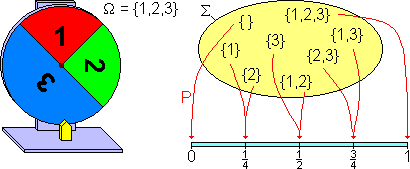

# Erfolg?
## Beispiel Glücksrad

In [3]:
'''wheel of fortune
   win 1€    if number 3
   lose 1€   if number 1
   no effect if number 2 '''
N = 100                               # number of games to play
# wheel randomization: 3's probability is twice the one of 1 and 2
x = np.random.choice([1, 2, 3], size=N, p=[1/4, 1/4, 1/2])  
print(x[:20],'...')                   # show 1st 20 numbers drawn from wheel 
wallet = 0                            # start with empty pockets, assume credit for bet
for i in x:                           # all N bets sum up to
    wallet += i-2                     # win = number - bet
print('my win: {}'.format(wallet))

[3 3 3 1 3 3 3 3 1 2 3 3 3 2 3 2 2 2 3 1] ...
my win: 23


In [4]:
'''---cards reloaded---'''
# cards     789  10  J  Q  K  A
x = np.array([0, 10, 2, 3, 4, 11])   # value of card
p = np.ones_like(x)/8.               # probability of card 4/32
p[0]*=3.                             # except for x=0  3 cards: 7,8,9
y = p*x                              # probability times value
original = np.get_printoptions()     # allow formatted printing
np.set_printoptions(formatter={'float': '{: 8.4f}'.format})
print('x={}'.format(1.0*x))
print('p={}'.format(p))
print('y={}'.format(y))
ym = y.sum()                         # average value
print('drawing one card gives in average a value of {}'.format(ym))
print('  total pips in deck = {}'.format(32.*ym))
np.set_printoptions(**original)      # restore print formatting 
print('  btw. mean of x is {}'.format(x.mean()))

x=[  0.0000  10.0000   2.0000   3.0000   4.0000  11.0000]
p=[  0.3750   0.1250   0.1250   0.1250   0.1250   0.1250]
y=[  0.0000   1.2500   0.2500   0.3750   0.5000   1.3750]
drawing one card gives in average a value of 3.75
  total pips in deck = 120.0
  btw. mean of x is 5.0


# Erwartungswert

#### Beschreibende Statistik
Mittelwert aus mehreren Beobachtungen
$$\overline{x} = \frac{1}{N}\sum_{i=1}^N x_i$$
Beim Histogramm (Klasseneinteilung)
$$\approx \overline{x'}=\frac{1}{\sum_{k=1}^{N_k}h_k}\sum_{k=1}^{N_k}h_k(x_k)\cdot x_k$$

#### Häufigkeitsinterpretation
Der Wert der bei sehr vielen $n\rightarrow\infty$ Versuchen im Mittel erreicht wird.

$\quad\Leftrightarrow$ wahrscheinlichster Wert

#### Wert, den wir fairerweise erwarten
- Wettquote, langfristige Gewinnchance
- Abgeleitet aus theoretischen Überlegungen

### die Werte *und* deren Verteilung
Der Erwartungswert hängt von den Werten *und* von der Wahrscheinlichkeitsverteilung für die Werte ab
- seltene tragen weniger dazu bei als häufigere
- ist ein *fester* Wert

## Definition Erwartungswert

Sei $X$ eine diskrete **Zufallsvariable**
- mit **Ergebnissen** (Elementarereignissen) $x_i$ $\; i\in\{1,2,\dots, N\}$
- und deren **Wahrscheinlichkeitsverteilung** $P(X=x)$, Abkürzung $p_i=p(X=x_i)$

dann ist der **Erwartungswert** von $X$:

<br>
<div class="alert alert-block alert-success">
$$\mu_X = \mathcal{E}(X) = \sum_{i=1}^N p_i\cdot x_i$$
</div>

$$\mathcal{E}(X) = \mu = \sum_{i=1}^N p_i\cdot x_i$$

### Beispiel Glücksrad von vorhin
    Einsatz:    2 €
    Gewinn:  Zahl €

    x=-1  p=1/4
    x= 0  p=1/4
    x=+1  p=1/2

$\mathcal{E}(X) = \frac{1}{4}$

In [5]:
'''example: wheel of fortune'''
xbsp = np.array([-1, 0, 1])            # outcomes -1 if number=1; +1 if number=3; 0 else
pbsp = np.array([.25, .25, .50])       # probability according to angle on wheel
print('normalized probability distribution? sum={:.3f}'.format(pbsp.sum()))
expectation = np.asarray([x*p for x, p in zip(xbsp, pbsp)]).sum()
print('expectation value of x = {:.3f}'.format(expectation))

normalized probability distribution? sum=1.000
expectation value of x = 0.250


## Transformationsregel für Erwartungswerte
Sei $g(x)$ eine reelle Funktion, dann gilt für $Y=g(X)$

$$\mathcal{E}(Y) = \mathcal{E}(g(X)) = \sum_{i=1}^N g(x_i) p_i$$

### Lineare Transformation für Erwartungswerte
Sei $Y=aX+b$, dann ist

$$\mathcal{E}(Y) = \mathcal{E}(aX+b) = a\mathcal{E}(X) + b$$

#### Beweis

$\mathcal{E}(aX+b)=\sum_{i=1}^N (ax_i + b)p_i = a\sum_{i=1}^N x_ip_i + b\sum_{i=1}^N p_i = a\mathcal{E}(X) + b\cdot 1$

## Zusammenfassung Erwartungswert
Definition: 

$$\mathcal{E}(X) = \mu_X = \sum_{i=1}^N p_i\cdot x_i$$

- entspricht dem arithmetischen Mittelwert, wenn Laplace'sche *Gleichverteilung* angenommen wird
    - $p=1/N$
- entspricht dem arithmetischen Mittelwert, wenn relative Häufigkeiten (Klasseneinteilung) angenommen werden
    - $p_i=\frac{n_i}{N}$
- Erstes Moment von $x$ über seiner Wahrscheinlichkeitsverteilung $p_i=p(x_i)$
- durch Wahrscheinlichkeitsverteilung *fest*gelegt. 
    - charakteristischer Wert
    - *jedes einzelne* Zufallsergebnis kann und wird durchaus vom Erwartungswert abweichen
    - das durchschnittliche Ergebnis von *vielen gleichen* Zufallsexperimenten    

# Streuung

## Definition Varianz

Sei $X$ eine Zufallsvariable mit Ausprägungen $x_i$ $\; i\in\{1,2,\dots, N\}$, Erwartungswert $\mu$ und  Wahrscheinlichkeitsverteilung $P(X=x)$, Abkürzung $p_i=p(X=x_i)$, dann ist die Varianz von $X$

<div class="alert alert-block alert-success">
$$\sigma^2 = \mathrm{Var}(X) = \sum_{i=1}^N p_i(x_i-\mu)^2$$
</div>

In [6]:
'''variance for example wheel of fortune - a)'''
# erw = np.asarray([x*p          for x, p in zip(xbsp, pbsp)]).sum()          # from above
var_a = np.asarray([p*(x-expectation)**2 for x, p in zip(xbsp, pbsp)]).sum()  # variance defined
print('variance as defined = {:.4f}'.format(var_a))

variance as defined = 0.6875


$$\mathrm{Var}(X) = \sigma^2 = \sum_{i=1}^N p_i(x_i-\mu)^2$$
### Varianz als quadratische Abweichung
Führt man eine neue Zufallsvariable $(X-\mu)^2$ ein, so ist
$$\mathrm{Var}(X) = \mathcal{E}((X-\mu)^2)$$

#### Interpretation
Erwartete quadratische Abweichung von $X$ vom Mittelwert $\mu$. 

Empirische Statistik: *durchschnittliche* quadratische Abweichung 
$$\tilde{s}^2 = \frac{1}{n}\sum_{i=1}^n(x_i-\overline{x})^2$$


In [7]:
'''variance for example wheel of fortune - b)'''
var_b = np.asarray([x*p for x, p in zip((xbsp-expectation)**2, pbsp)]).sum()
print('variance as expected squared difference = {:.4f}'.format(var_b))

variance as expected squared difference = 0.6875


### Verschiebungssatz für Varianzen
$$\mathrm{Var}(X) = \mathcal{E}(X^2-\mathcal{E}(X)^2) = \mathcal{E}(X^2)-\mu^2$$

#### Beweis
$\begin{aligned}
\mathrm{Var}(X) &= \mathcal{E}((X-\mu)^2) \\
\; &= \mathcal{E}((X^2 - 2\mu X + \mu^2)\\
\; &= \mathcal{E}(X^2) + \mathcal{E}(-2\mu X) + \mathcal{E}(\mu^2)\\
\; &= \mathcal{E}(X^2) - 2\mu\mathcal{E}(X) + \mu^2\\
\; &= \mathcal{E}(X^2) - 2\mu^2 + \mu^2
\end{aligned}$

In [8]:
'''variance for example wheel of fortune - c)'''
var_c = np.asarray([x*p for x, p in zip(xbsp**2, pbsp)]).sum()
var_c -= expectation**2
print('variance centralized = {:.4f}'.format(var_b))

variance centralized = 0.6875


### Varianz unter linearer Transformation
$$\mathrm{Var}(aX+b) = a^2 \mathrm{Var}(X)$$

#### Beweis:
$\mathrm{Var}(aX+b) = \mathcal{E}([aX+b-\mathcal{E}(aX+b)]^2)$

$\qquad = \mathcal{E}([aX+b-a\mathcal{E}(X)-b]^2)$

$\qquad = a^2\mathcal{E}([X-\mathcal{E}(X)]^2) = a^2\mathrm{Var}(X)$

In [9]:
'''displacement rule for example wheel of fortune'''
expT = np.asarray([x*p for x, p in zip(2*xbsp-3, pbsp)]).sum()
varT = np.asarray([x*p for x, p in zip(((2*xbsp-3)-expT)**2, pbsp)]).sum()
print('variance under linear transformation 2x-3 = {:.4f}'.format(varT))

variance under linear transformation 2x-3 = 2.7500


# Zusammenfassung:
### Wichtige Kennzahlen einer Zufallsvariablen $X$ sind
#### Erwartungswert
$$\mathcal{E}(X) = \mu_X = \sum_{i=1}^N p_i\cdot x_i$$
#### Varianz
$$\begin{aligned}
\mathrm{Var}(X) = \sigma^2_X &= \sum_{i=1}^N p_i(x_i-\mu)^2\\
 &= \mathcal{E}\left( (X-\mu_X)^2 \right)
\end{aligned}$$

#### Beides sind *feste* Größen der Zufallsvariablen $X$
- Ergebnisse, Werte(bereich) $x_i$
- Wahrscheinlichkeitsverteilung $p_i$

### Vergleiche mit
Arithmetischem Mittelwert
$$\overline{x} = \frac{1}{N}\sum_{i=1}^Nx_i$$

Empirischer Varianz
$$s^2 = \frac{1}{N} \sum_{i=1}^{N} \left( x_i-\overline{x} \right)^2$$

In [10]:
'''random variable X in Python'''
omega = np.array([1, 2, 3])                # possible results of random experiment, e.g. wheel of fortune
probabilities = np.array([.25, .25, .50])  # ... and their corresponding probabilities

In [11]:
'''draw:
   out of random variable X with elementary results X1..X3
   with probabilities p1..p3 (same number as X, sum up to 1 (normalization))
   N=100 random experiments'''
xi = np.random.choice(omega, size=100, p=probabilities)
print('the result of {} draws gave {:.4f} points in average'.format(len(xi), xi.mean()))

the result of 100 draws gave 2.3300 points in average


In [12]:
'''calculate Expectation Value'''
expectation = (probabilities*omega).sum()      # numpy '*' multiplies element wise
'''calculate Variance'''
Var = (probabilities*(omega-expectation)**2).sum()
print('Wheel of fortune has expectation value of {} with standard deviation {:.5f}'
      .format(expectation, np.sqrt(Var)))

Wheel of fortune has expectation value of 2.25 with standard deviation 0.82916


# Fragen?